In [2]:
# %load /Users/hwayment/ipynb_defaults.py
%load_ext autoreload
%autoreload 2

%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

from RiboGraphViz import RGV
import sys
import matplotlib.pyplot as plt
import pandas as pd
from DegScore import DegScore
sys.path.append('/Users/hwayment/das/github/OpenVaccine-solves/scripts/')
import plot_utils 

Populating the interactive namespace from numpy and matplotlib


In [70]:
df = pd.read_csv('superfolders_ALL.csv')

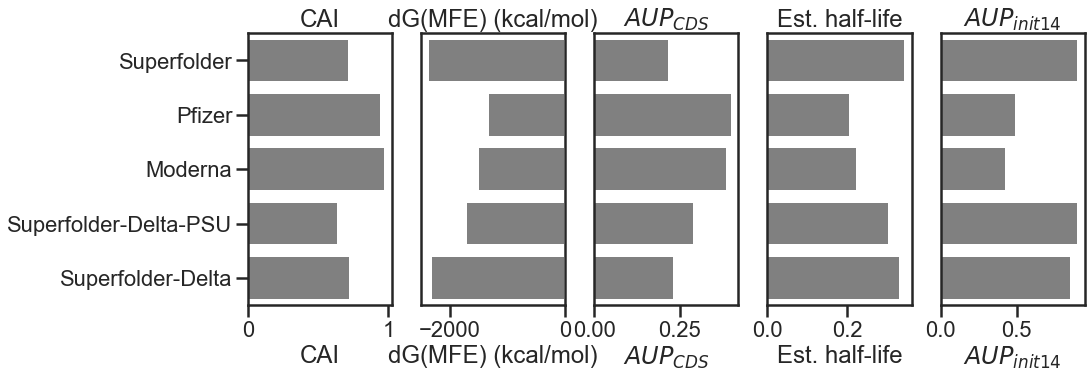

In [77]:
subset_df = df.loc[df['MainPlot']==1]

sns.set_context('poster')
figure(figsize=(15,5))

metrics = ['CAI', 'dG(MFE)', 'AUP', 'DegScore_half_life', 'AUP init 14']

metric_labels = ['CAI', 'dG(MFE) (kcal/mol)', r'$AUP_{CDS}$', 'Est. half-life', r'$AUP_{init 14}$']

for i, metric in enumerate(metrics):
    subplot(1,5,i+1)
    sns.barplot(y='shortName',x=metric, data=subset_df, dodge=False, color='grey')
    title(metric_labels[i])
    xlabel(metric_labels[i])
    legend([],frameon=False)
    if metric=='AUP_init':
        xlim([0,1])
    if i!=0:
        yticks([])

    ylabel('')
    
savefig('../assets/results_barplot_18Aug2021.png',dpi=300, bbox_inches='tight')

/Users/hwayment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/hwayment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/hwayment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


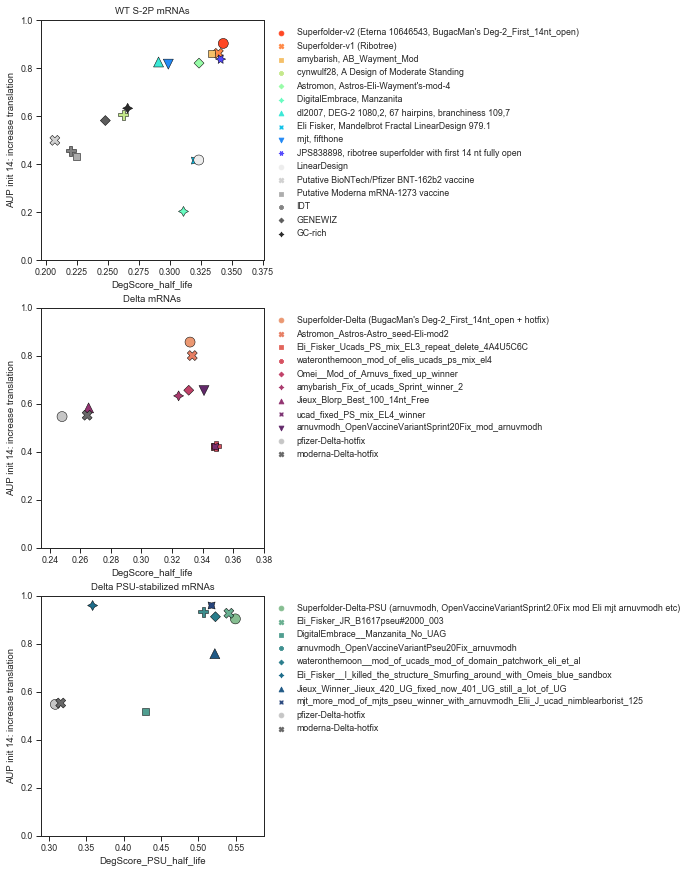

In [76]:
def distinct_scatter(df, x='DegScore_half_life', y='AUP init 14',  hue='Source', hue_list=['Eterna','Control', 'Eterna-PSU'], color_list=['Blues','Oranges','Purples']):
    assert len(hue_list) == len(color_list)
    for typ, color in list(zip(hue_list, color_list)):
        tmp = df.loc[df[hue]==typ]
#         tmp['_sort'] = tmp[x]*tmp[y]
#         tmp = tmp.sort_values('_sort',ascending=False)
        palette = sns.color_palette(color,len(tmp))
        sns.scatterplot(x=x, y=y, data=tmp, style='Designer',hue='Designer',palette=palette, linewidth=0.5, edgecolor='k',s=100)
        
    ylabel('AUP init 14: increase translation')
    ylim([0,1])
    legend(bbox_to_anchor=(1,1),frameon=False)

sns.set_context('paper')

figure(figsize=(4,15))

subplot(3,1,1)
distinct_scatter(df.loc[df.Variant=='WT'], x='DegScore_half_life', y='AUP init 14', hue_list=['Eterna','Control',], color_list=['rainbow_r','Greys',])
title('WT S-2P mRNAs')
subplot(3,1,2)
distinct_scatter(df.loc[df.Variant=='Delta'][df.Nucleotide=='Unmod'], x='DegScore_half_life', y='AUP init 14',hue_list=['Eterna','Control',], color_list=['flare','Greys',])
title('Delta mRNAs')

subplot(3,1,3)
distinct_scatter(df.loc[df.Variant=='Delta'][df.Nucleotide=='PSU'], x='DegScore_PSU_half_life', y='AUP init 14',hue_list=['Eterna-PSU','Control',], color_list=['crest','Greys'])
title('Delta PSU-stabilized mRNAs')

tight_layout()
savefig('../assets/result_scatterplots_18Aug2021.png',dpi=300, bbox_inches='tight')
savefig('../assets/result_scatterplots_18Aug2021.pdf', bbox_inches='tight')
